In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
wildlife = pd.read_csv('../clean_data/wildlife_clean.csv', parse_dates=['CALL_SAVED_TIME'])

In [3]:
wildlife.shape

(152743, 6)

In [4]:
wildlife.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152743 entries, 0 to 152742
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Unnamed: 0       152743 non-null  int64         
 1   CALL_REGION      152743 non-null  object        
 2   CALL_SAVED_TIME  152672 non-null  datetime64[ns]
 3   CA_ANIMAL_TYPE   152743 non-null  object        
 4   reason_for_call  152743 non-null  object        
 5   type_of_calls    152743 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 7.0+ MB


In [5]:
wildlife.head()

,Unnamed: 0,CALL_REGION,CALL_SAVED_TIME,CA_ANIMAL_TYPE,reason_for_call,type_of_calls
0,0,Central,2020-01-01,Deer,rescue,report_calls
1,1,Central,2020-01-01,Deer,rescue,report_calls
2,2,Central,2020-01-01,Deer,rescue,report_calls
3,3,Aberdeen,2020-01-01,Wild Bird,injury,report_calls
4,4,Central,2020-01-01,Gull,injury,report_calls


In [6]:
wildlife_injuries = wildlife[wildlife['reason_for_call']=='injury'].copy()
wildlife_injuries.info()
#Client is mostly interested in injuries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83661 entries, 3 to 152742
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       83661 non-null  int64         
 1   CALL_REGION      83661 non-null  object        
 2   CALL_SAVED_TIME  83633 non-null  datetime64[ns]
 3   CA_ANIMAL_TYPE   83661 non-null  object        
 4   reason_for_call  83661 non-null  object        
 5   type_of_calls    83661 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 4.5+ MB


## Trend by region

In [7]:
df_count = wildlife_injuries.groupby('CALL_REGION').count().sort_values(['reason_for_call'], ascending = False)[['reason_for_call']]

In [8]:
df_count['Region'] = df_count.index

In [9]:
df_count
#there are more injuries in Glasgow reported, due to more population?

,reason_for_call,Region
CALL_REGION,,
Glasgow,22056,Glasgow
Central,18826,Central
Aberdeen,15993,Aberdeen
Edinburgh,14996,Edinburgh
Unknown,6117,Unknown
Inverness,5673,Inverness


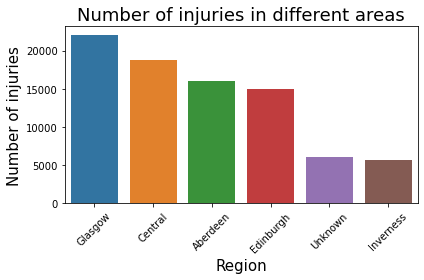

In [10]:
sns.barplot(x = 'Region',y = 'reason_for_call', data = df_count)
plt.xticks(rotation = 45)
plt.xlabel("Region", size=15)
plt.ylabel("Number of injuries", size=15)
plt.title("Number of injuries in different areas", size=18)
plt.tight_layout()

## Trend by year

In [11]:
df_time = wildlife_injuries.groupby(['CALL_SAVED_TIME']).count()
df_time

,Unnamed: 0,CALL_REGION,CA_ANIMAL_TYPE,reason_for_call,type_of_calls
CALL_SAVED_TIME,,,,,
2018-01-01,34,34,34,34,34
2018-01-02,33,33,33,33,33
2018-01-03,44,44,44,44,44
2018-01-04,29,29,29,29,29
2018-01-05,44,44,44,44,44
...,...,...,...,...,...
2020-04-26,101,101,101,101,101
2020-04-27,93,93,93,93,93
2020-04-28,85,85,85,85,85


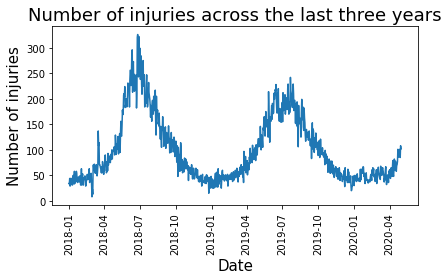

In [12]:
sns.lineplot(x = "CALL_SAVED_TIME", y = "reason_for_call", data = df_time)
plt.xticks(rotation = 90)
plt.xlabel("Date", size=15)
plt.ylabel("Number of injuries", size=15)
plt.title("Number of injuries across the last three years", size=18)
plt.tight_layout()

Looks like there is a trend of increase in injuries at summer time. Possibly because people walk more often and report injuries?

(17550, 17800)

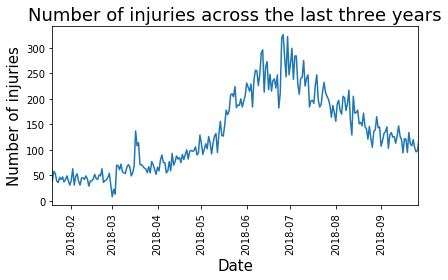

In [13]:
sns.lineplot(x = "CALL_SAVED_TIME", y = "reason_for_call", data = df_time)
plt.xticks(rotation = 90)
plt.xlabel("Date", size=15)
plt.ylabel("Number of injuries", size=15)
plt.title("Number of injuries across the last three years", size=18)
plt.tight_layout()
plt.xlim(17550,17800)

Quite a big spikes of report at around spring time in 2018.

## By year and region

In [14]:
injuries=wildlife.query("reason_for_call =='injury'")
weekly_injuries_by_region=injuries.groupby([pd.Grouper(key='CALL_SAVED_TIME',freq='W'),'CALL_REGION']).count()
weekly_injuries_by_region

Unnamed: 0  CA_ANIMAL_TYPE  reason_for_call  \
CALL_SAVED_TIME CALL_REGION                                                
2018-01-07      Aberdeen             54              54               54   
                Central              46              46               46   
                Edinburgh            47              47               47   
                Glasgow              70              70               70   
                Inverness            16              16               16   
...                                 ...             ...              ...   
2020-05-03      Central              95              95               95   
                Edinburgh            68              68               68   
                Glasgow              98              98               98   
                Inverness            21              21               21   
                Unknown              44              44               44   

                             type_of_calls  
CALL_SAVED_TIME CALL_REGION                 
2018-01-07      Aberdeen                54  
                Central                 46  
                Edinburgh               47  
                Glasgow                 70  
                Inverness               16  
...                                    ...  
2020-05-03      Central                 95  
                Edinburgh               68  
                Glasgow                 98  
                Inverness               21  
                Unknown                 44  

[732 rows x 4 columns]

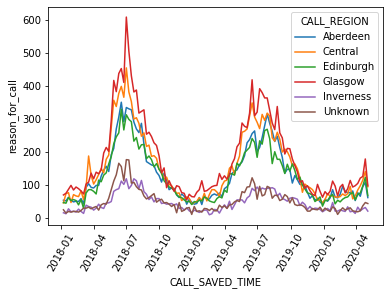

In [15]:
sns.lineplot(x="CALL_SAVED_TIME", y="reason_for_call", hue='CALL_REGION',data=weekly_injuries_by_region)
plt.xticks(rotation=60);

<AxesSubplot:xlabel='CALL_SAVED_TIME', ylabel='reason_for_call'>

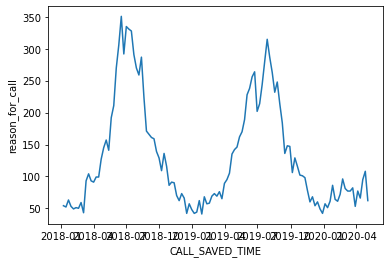

In [16]:
# any better for just one region?
aberdeen=weekly_injuries_by_region.query('CALL_REGION=="Aberdeen"')
sns.lineplot(data=aberdeen,x='CALL_SAVED_TIME',y='reason_for_call')

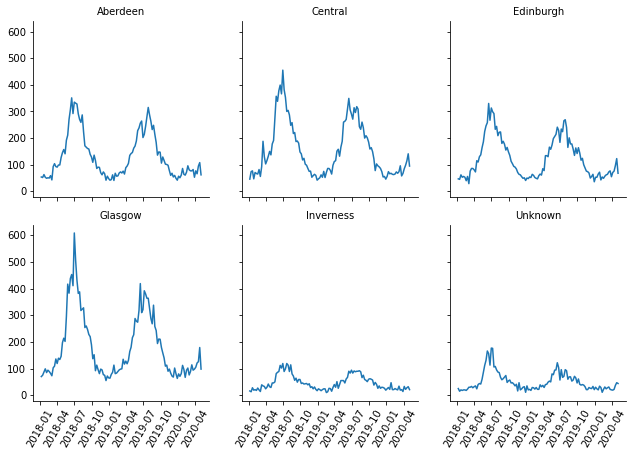

In [17]:
# it's the small things!
# should have been map_dataframe here, not map
separate=sns.FacetGrid(weekly_injuries_by_region.reset_index(), col='CALL_REGION', col_wrap=3)
separate.map_dataframe(sns.lineplot, x='CALL_SAVED_TIME', y='reason_for_call')
# this gets rid of CALL_REGION =
separate.set_titles('{col_name}')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in separate.axes.flat];

# Trend by types of animals

In [18]:
df_type_region = wildlife_injuries.groupby(['CALL_REGION','CA_ANIMAL_TYPE']).count()
df_type_region

Unnamed: 0  CALL_SAVED_TIME  reason_for_call  \
CALL_REGION CA_ANIMAL_TYPE                                                  
Aberdeen    *Other Wildlife         192              192              192   
            Badger                   40               40               40   
            Bat                     170              170              170   
            Deer                    615              615              615   
            Duck                    259              259              259   
...                                 ...              ...              ...   
Unknown     Swan                    313              313              313   
            Weasel                    6                6                6   
            Wild Bird              2495             2494             2495   
            Wild Mouse               32               32               32   
            Wild Rabbit              65               65               65   

                             type_of_calls  
CALL_REGION CA_ANIMAL_TYPE                  
Aberdeen    *Other Wildlife            192  
            Badger                      40  
            Bat                        170  
            Deer                       615  
            Duck                       259  
...                                    ...  
Unknown     Swan                       313  
            Weasel                       6  
            Wild Bird                 2495  
            Wild Mouse                  32  
            Wild Rabbit                 65  

[143 rows x 4 columns]

In [19]:
df_type_region.reset_index(inplace = True)

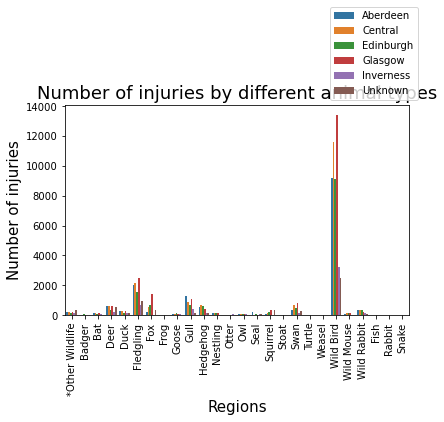

In [20]:
sns.barplot(x="CA_ANIMAL_TYPE", hue = 'CALL_REGION', y="reason_for_call", data=df_type_region)
plt.xlabel("Regions", size=15)
plt.ylabel("Number of injuries", size=15)
plt.title("Number of injuries by different animal types", size=18)
plt.tight_layout()
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.04,1), loc="lower right")

In [21]:
bird_region = df_type_region[df_type_region['CA_ANIMAL_TYPE']== 'Wild Bird']
bird_region = bird_region.sort_values('reason_for_call', ascending=False)
#created a new table as there are lots of wild birds in each region

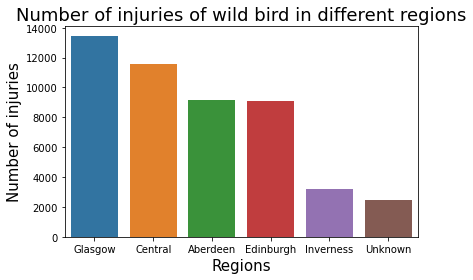

In [22]:
sns.barplot(x="CALL_REGION", y="reason_for_call", data=bird_region)
plt.xlabel("Regions", size=15)
plt.ylabel("Number of injuries", size=15)
plt.title("Number of injuries of wild bird in different regions", size=18)
plt.tight_layout()

In [23]:
all_types_region = df_type_region[df_type_region['CA_ANIMAL_TYPE']!= 'Wild Bird']
#table without wild bird

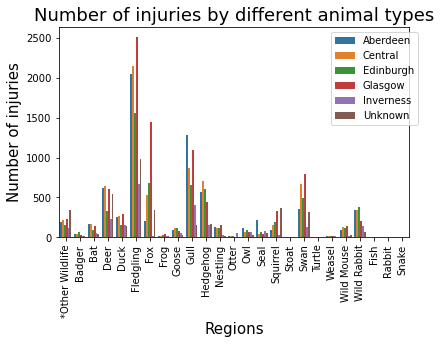

In [41]:
sns.barplot(x="CA_ANIMAL_TYPE", hue = 'CALL_REGION', y="reason_for_call", data=all_types_region)
plt.xlabel("Regions", size=15)
plt.ylabel("Number of injuries", size=15)
plt.title("Number of injuries by different animal types", size=18)
plt.tight_layout()
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper right")

In [24]:
all_types_region_high = all_types_region[all_types_region['reason_for_call'] >= 200]
all_types_region_low = all_types_region[all_types_region['reason_for_call'] < 200]

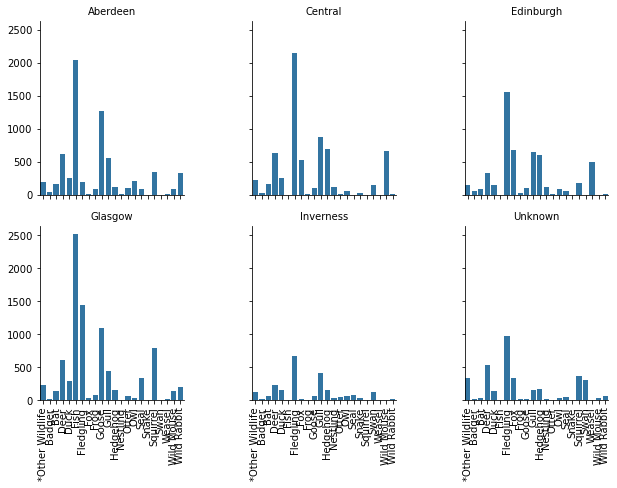

In [59]:
s_type=sns.FacetGrid(all_types_region, col='CALL_REGION', col_wrap=3)
s_type.map_dataframe(sns.barplot, x='CA_ANIMAL_TYPE', y='reason_for_call')
s_type.set_titles('{col_name}')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in s_type.axes.flat];

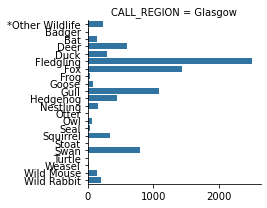

In [104]:
temp = all_types_region[all_types_region['CALL_REGION'] =="Glasgow"]
s_type=sns.FacetGrid(temp, col='CALL_REGION', col_wrap=3)
s_type.map_dataframe(sns.barplot, y='CA_ANIMAL_TYPE', x='reason_for_call',orient = 'h')

In [ ]:
all_types_

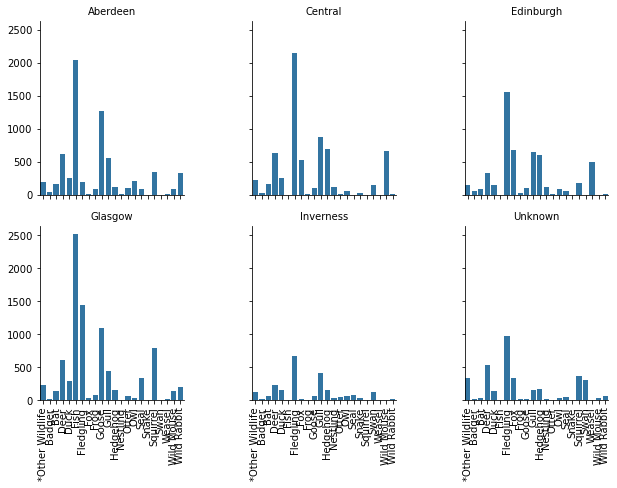

In [105]:
s_type=sns.FacetGrid(all_types_region, col='CALL_REGION', col_wrap=3)
s_type.map_dataframe(sns.barplot, x='CA_ANIMAL_TYPE', y='reason_for_call')
s_type.set_titles('{col_name}')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in s_type.axes.flat];

In [93]:
all_types_region.groupby('CALL_REGION').sum().sort_values('reason_for_call',ascending = False).head(5)

,Unnamed: 0,CALL_SAVED_TIME,reason_for_call,type_of_calls
CALL_REGION,,,,
Glasgow,8636,8634,8636,8636
Central,7253,7250,7253,7253
Aberdeen,6838,6834,6838,6838
Edinburgh,5894,5890,5894,5894
Unknown,3622,3620,3622,3622


In [100]:
all_types_region_high.sort_values('reason_for_call',ascending = False).groupby('CALL_REGION').head(5).sort_values('CALL_REGION')

,CALL_REGION,CA_ANIMAL_TYPE,Unnamed: 0,CALL_SAVED_TIME,reason_for_call,type_of_calls
5,Aberdeen,Fledgling,2042,2041,2042,2042
3,Aberdeen,Deer,615,615,615,615
9,Aberdeen,Gull,1277,1277,1277,1277
17,Aberdeen,Swan,353,353,353,353
10,Aberdeen,Hedgehog,569,567,569,569
34,Central,Hedgehog,703,703,703,703
29,Central,Fledgling,2147,2146,2147,2147
26,Central,Deer,643,643,643,643
33,Central,Gull,874,874,874,874
43,Central,Swan,669,669,669,669


In [99]:
all_types_region.sort_values('reason_for_call',ascending = False).groupby('CALL_REGION').head(5).sort_values('CALL_REGION')

,CALL_REGION,CA_ANIMAL_TYPE,Unnamed: 0,CALL_SAVED_TIME,reason_for_call,type_of_calls,animal_type
5,Aberdeen,Fledgling,2042,2041,2042,2042,Fledgling
17,Aberdeen,Swan,353,353,353,353,Swan
9,Aberdeen,Gull,1277,1277,1277,1277,Gull
10,Aberdeen,Hedgehog,569,567,569,569,Hedgehog
3,Aberdeen,Deer,615,615,615,615,Deer
29,Central,Fledgling,2147,2146,2147,2147,Fledgling
33,Central,Gull,874,874,874,874,Gull
34,Central,Hedgehog,703,703,703,703,Hedgehog
43,Central,Swan,669,669,669,669,Swan
26,Central,Deer,643,643,643,643,Deer


In [95]:
all_types_region.groupby(['CALL_REGION','CA_ANIMAL_TYPE']).nlargest(5)

0      192
1       40
2      170
3      615
4      259
      ... 
137    370
138    313
139      6
141     32
142     65
Name: reason_for_call, Length: 137, dtype: int64

In [63]:
all_types_region.nlargest(30,'reason_for_call')

,CALL_REGION,CA_ANIMAL_TYPE,Unnamed: 0,CALL_SAVED_TIME,reason_for_call,type_of_calls,animal_type
78,Glasgow,Fledgling,2515,2515,2515,2515,Fledgling
29,Central,Fledgling,2147,2146,2147,2147,Fledgling
5,Aberdeen,Fledgling,2042,2041,2042,2042,Fledgling
54,Edinburgh,Fledgling,1559,1559,1559,1559,Fledgling
79,Glasgow,Fox,1440,1440,1440,1440,0
9,Aberdeen,Gull,1277,1277,1277,1277,0
82,Glasgow,Gull,1088,1088,1088,1088,0
126,Unknown,Fledgling,975,974,975,975,Fledgling
33,Central,Gull,874,874,874,874,0
90,Glasgow,Swan,790,789,790,790,0


In [29]:
all_types_region_high.nlargest(5,'reason_for_call')

,CALL_REGION,CA_ANIMAL_TYPE,Unnamed: 0,CALL_SAVED_TIME,reason_for_call,type_of_calls
78,Glasgow,Fledgling,2515,2515,2515,2515
29,Central,Fledgling,2147,2146,2147,2147
5,Aberdeen,Fledgling,2042,2041,2042,2042
54,Edinburgh,Fledgling,1559,1559,1559,1559
79,Glasgow,Fox,1440,1440,1440,1440


In [44]:
all_types_region_fox_fled = all_types_region[all_types_region['CA_ANIMAL_TYPE'].isin(['Fledgling','Fox'])]
all_types_region_fox_fled

,CALL_REGION,CA_ANIMAL_TYPE,Unnamed: 0,CALL_SAVED_TIME,reason_for_call,type_of_calls
5,Aberdeen,Fledgling,2042,2041,2042,2042
6,Aberdeen,Fox,197,197,197,197
29,Central,Fledgling,2147,2146,2147,2147
30,Central,Fox,532,532,532,532
54,Edinburgh,Fledgling,1559,1559,1559,1559
55,Edinburgh,Fox,676,675,676,676
78,Glasgow,Fledgling,2515,2515,2515,2515
79,Glasgow,Fox,1440,1440,1440,1440
102,Inverness,Fledgling,666,665,666,666
103,Inverness,Fox,14,14,14,14


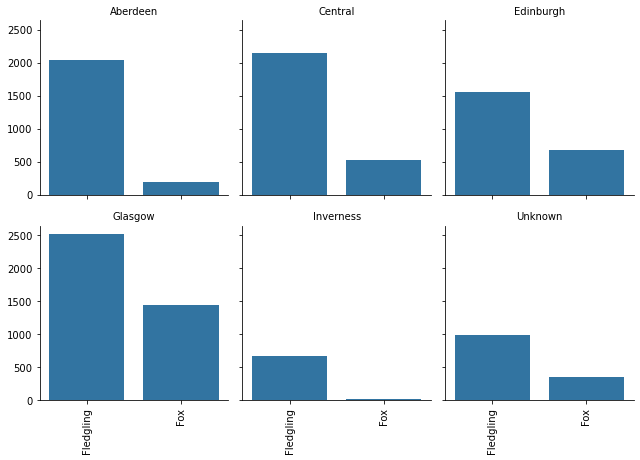

In [46]:
s_type=sns.FacetGrid(all_types_region_fox_fled, col='CALL_REGION', col_wrap=3)
s_type.map_dataframe(sns.barplot, x='CA_ANIMAL_TYPE', y='reason_for_call')
s_type.set_titles('{col_name}')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in s_type.axes.flat];

In [80]:
conditions = [
    (all_types_region['CA_ANIMAL_TYPE']=='Fledgling'), (all_types_region['CA_ANIMAL_TYPE']=='Fox'),
    (all_types_region['CA_ANIMAL_TYPE']=='Gull'),(all_types_region['CA_ANIMAL_TYPE']=='Swan'),
    (all_types_region['CA_ANIMAL_TYPE']=='Hedgehog'), (all_types_region['CA_ANIMAL_TYPE']=='Deer'),
    (all_types_region['CA_ANIMAL_TYPE']=='*Other Wildlife'),(all_types_region['CA_ANIMAL_TYPE']=='Badger'),
    (all_types_region['CA_ANIMAL_TYPE']=='Bat'),(all_types_region['CA_ANIMAL_TYPE']=='Duck'),
    (all_types_region['CA_ANIMAL_TYPE']=='Frog'),(all_types_region['CA_ANIMAL_TYPE']=='Goose'),
    (all_types_region['CA_ANIMAL_TYPE']=='Nestling'),(all_types_region['CA_ANIMAL_TYPE']=='Otter'),
    (all_types_region['CA_ANIMAL_TYPE']=='Owl'),(all_types_region['CA_ANIMAL_TYPE']=='Seal'),
    (all_types_region['CA_ANIMAL_TYPE']=='Squirrel'),(all_types_region['CA_ANIMAL_TYPE']=='Weasel'),
    (all_types_region['CA_ANIMAL_TYPE']=='Turtle'),(all_types_region['CA_ANIMAL_TYPE']=='Seal'),
    (all_types_region['CA_ANIMAL_TYPE']=='Wild Mouse'),(all_types_region['CA_ANIMAL_TYPE']=='Wild Rabbit'),
    (all_types_region['CA_ANIMAL_TYPE']=='Fish'),(all_types_region['CA_ANIMAL_TYPE']=='Rabbit'),
    (all_types_region['CA_ANIMAL_TYPE']=='Snake'),(all_types_region['CA_ANIMAL_TYPE']=='Stoat')
]
choices = ['Fledgling', 'Fox','Gull','Swan','Hedgehog','Deer','Other','Other','Other','Other','Other','Other','Other',
          'Other','Other','Other','Other','Other','Other','Other','Other','Other','Other','Other','Other','Other']

In [81]:
all_types_region['animal_type']=np.select(conditions,choices).copy()

<ipython-input-81-7b6921d577c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_types_region['animal_type']=np.select(conditions,choices).copy()


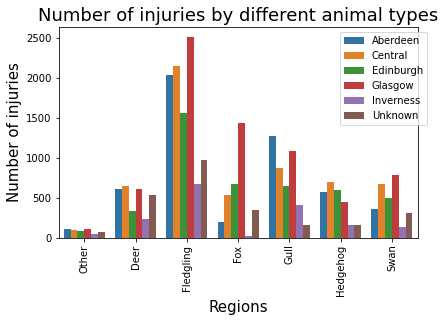

In [86]:
sns.barplot(x="animal_type", hue = 'CALL_REGION', y="reason_for_call", data=all_types_region,ci = False)
plt.xlabel("Regions", size=15)
plt.ylabel("Number of injuries", size=15)
plt.title("Number of injuries by different animal types", size=18)
plt.tight_layout()
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper right")

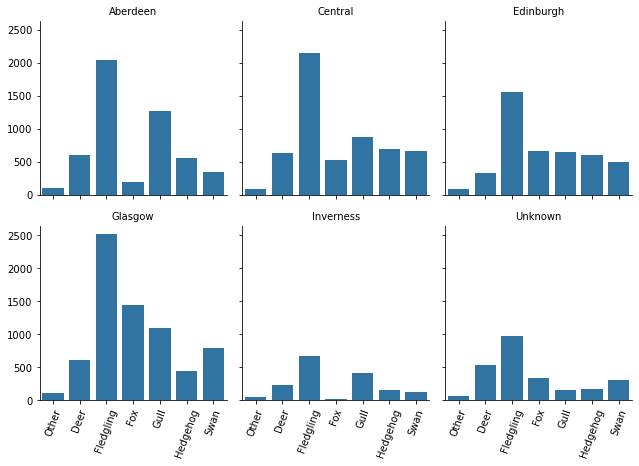

In [89]:
s_type=sns.FacetGrid(all_types_region, col='CALL_REGION', col_wrap=3)
s_type.map_dataframe(sns.barplot, x='animal_type', y='reason_for_call',ci = False)
s_type.set_titles('{col_name}')
[plt.setp(ax.get_xticklabels(), rotation=70) for ax in s_type.axes.flat];

# Trend by types and year

In [30]:
weekly_injuries_by_types=injuries.groupby([pd.Grouper(key='CALL_SAVED_TIME',freq='W'),'CA_ANIMAL_TYPE']).count()
weekly_injuries_by_types

Unnamed: 0  CALL_REGION  reason_for_call  \
CALL_SAVED_TIME CA_ANIMAL_TYPE                                              
2018-01-07      *Other Wildlife           6            6                6   
                Deer                     20           20               20   
                Duck                      4            4                4   
                Fledgling                 7            7                7   
                Fox                      22           22               22   
...                                     ...          ...              ...   
2020-05-03      Squirrel                 10           10               10   
                Swan                     20           20               20   
                Wild Bird               203          203              203   
                Wild Mouse                6            6                6   
                Wild Rabbit               8            8                8   

                                 type_of_calls  
CALL_SAVED_TIME CA_ANIMAL_TYPE                  
2018-01-07      *Other Wildlife              6  
                Deer                        20  
                Duck                         4  
                Fledgling                    7  
                Fox                         22  
...                                        ...  
2020-05-03      Squirrel                    10  
                Swan                        20  
                Wild Bird                  203  
                Wild Mouse                   6  
                Wild Rabbit                  8  

[2177 rows x 4 columns]

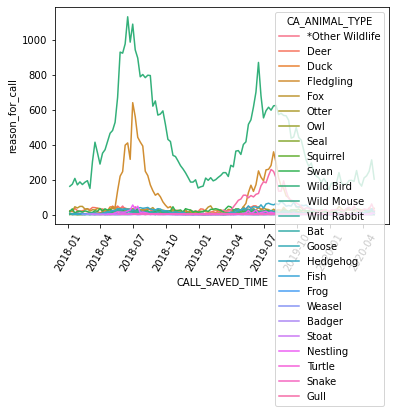

In [31]:
sns.lineplot(x="CALL_SAVED_TIME", y="reason_for_call", hue='CA_ANIMAL_TYPE',data=weekly_injuries_by_types)
plt.xticks(rotation=60);

# Analysis of advice calls

In [32]:
calls_df = wildlife.groupby(['type_of_calls','CALL_SAVED_TIME']).count().reset_index()
calls_df

,type_of_calls,CALL_SAVED_TIME,Unnamed: 0,CALL_REGION,CA_ANIMAL_TYPE,reason_for_call
0,advice_calls,2018-01-01,1,1,1,1
1,advice_calls,2018-01-02,3,3,3,3
2,advice_calls,2018-01-03,2,2,2,2
3,advice_calls,2018-01-04,4,4,4,4
4,advice_calls,2018-01-05,6,6,6,6
...,...,...,...,...,...,...
1554,report_calls,2020-04-26,181,181,181,181
1555,report_calls,2020-04-27,178,178,178,178
1556,report_calls,2020-04-28,167,167,167,167
1557,report_calls,2020-04-29,185,185,185,185


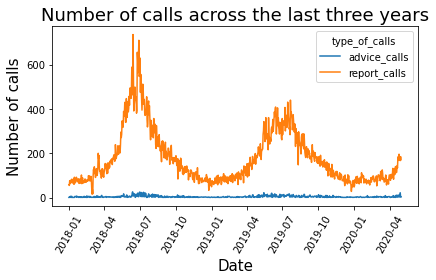

In [33]:
sns.lineplot(x = "CALL_SAVED_TIME", y = "reason_for_call",hue = 'type_of_calls', data = calls_df)
plt.xticks(rotation = 60)
plt.xlabel("Date", size=15)
plt.ylabel("Number of calls", size=15)
plt.title("Number of calls across the last three years", size=18)
plt.tight_layout()
#as expected there are more report calls than advice

In [34]:
advice_df = calls_df[calls_df['type_of_calls']=='advice_calls']

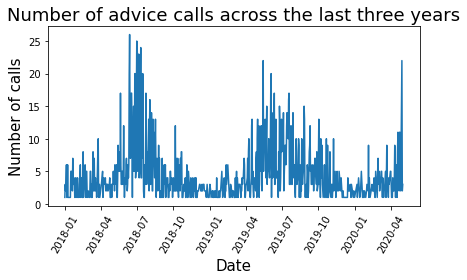

In [35]:
sns.lineplot(x = "CALL_SAVED_TIME", y = "reason_for_call", data = advice_df)
plt.xticks(rotation = 60)
plt.xlabel("Date", size=15)
plt.ylabel("Number of calls", size=15)
plt.title("Number of advice calls across the last three years", size=18)
plt.tight_layout()
#so many lines, requires to be changed to weekly calls

In [36]:
weekly_calls = wildlife.groupby([pd.Grouper(key = 'CALL_SAVED_TIME',freq = 'W'),'type_of_calls']).count()
weekly_calls

Unnamed: 0  CALL_REGION  CA_ANIMAL_TYPE  \
CALL_SAVED_TIME type_of_calls                                            
2018-01-07      advice_calls           18           18              18   
                report_calls          466          466             466   
2018-01-14      advice_calls           11           11              11   
                report_calls          519          519             519   
2018-01-21      advice_calls           25           25              25   
...                                   ...          ...             ...   
2020-04-19      report_calls          864          864             864   
2020-04-26      advice_calls           39           39              39   
                report_calls         1186         1186            1186   
2020-05-03      advice_calls           43           43              43   
                report_calls          701          701             701   

                               reason_for_call  
CALL_SAVED_TIME type_of_calls                   
2018-01-07      advice_calls                18  
                report_calls               466  
2018-01-14      advice_calls                11  
                report_calls               519  
2018-01-21      advice_calls                25  
...                                        ...  
2020-04-19      report_calls               864  
2020-04-26      advice_calls                39  
                report_calls              1186  
2020-05-03      advice_calls                43  
                report_calls               701  

[244 rows x 4 columns]

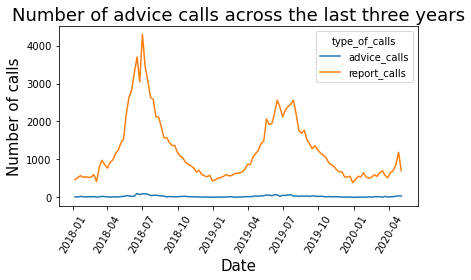

In [37]:
sns.lineplot(x = "CALL_SAVED_TIME", y = "reason_for_call", hue = 'type_of_calls', data = weekly_calls)
plt.xticks(rotation = 60)
plt.xlabel("Date", size=15)
plt.ylabel("Number of calls", size=15)
plt.title("Number of advice calls across the last three years", size=18)
plt.tight_layout()
#the same as daily plot but more smoother

In [38]:
advice_weekly_df = weekly_calls.reset_index()
advice_weekly_df = advice_weekly_df[advice_weekly_df['type_of_calls']=='advice_calls']

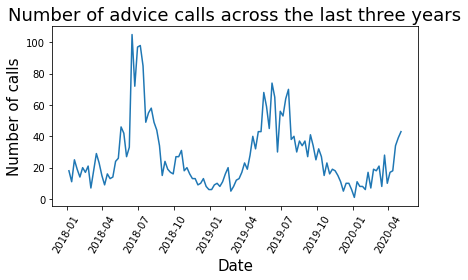

In [39]:
sns.lineplot(x = "CALL_SAVED_TIME", y = "reason_for_call", data = advice_weekly_df)
plt.xticks(rotation = 60)
plt.xlabel("Date", size=15)
plt.ylabel("Number of calls", size=15)
plt.title("Number of advice calls across the last three years", size=18)
plt.tight_layout()

#similar trend - increase at around spring/summer time